# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [1]:
!pip install mnist 

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.12/x64/bin/python -m pip install --upgrade pip' command.


#### Importing necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


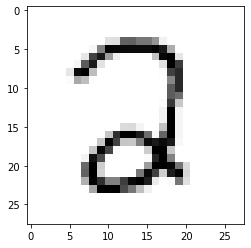

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [14]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [17]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [18]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [19]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [20]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======


Epoch 0, Loss 0.2312
Training Accuracy: 0.7342, Testing Accuracy: 0.7520



Epoch 10, Loss 0.1157
Training Accuracy: 0.8993, Testing Accuracy: 0.9073



Epoch 20, Loss 0.0656
Training Accuracy: 0.9301, Testing Accuracy: 0.9425



Epoch 30, Loss 0.0488
Training Accuracy: 0.9472, Testing Accuracy: 0.9536



Epoch 40, Loss 0.041
Training Accuracy: 0.9540, Testing Accuracy: 0.9607



Epoch 50, Loss 0.0365
Training Accuracy: 0.9583, Testing Accuracy: 0.9627



Epoch 60, Loss 0.0336
Training Accuracy: 0.9613, Testing Accuracy: 0.9662



Epoch 70, Loss 0.0315
Training Accuracy: 0.9635, Testing Accuracy: 0.9672



Epoch 80, Loss 0.0299
Training Accuracy: 0.9649, Testing Accuracy: 0.9677



Epoch 90, Loss 0.0285
Training Accuracy: 0.9670, Testing Accuracy: 0.9677



Epoch 100, Loss 0.0274
Training Accuracy: 0.9677, Testing Accuracy: 0.9667



Epoch 110, Loss 0.0265
Training Accuracy: 0.9689, Testing Accuracy: 0.9672



Epoch 120, Loss 0.0257
Training Accuracy: 0.9702, Testing Accuracy: 0.9667



Epoch 130, Loss 0.0249
Training Accuracy: 0.9705, Testing Accuracy: 0.9672



Epoch 140, Loss 0.0243
Training Accuracy: 0.9717, Testing Accuracy: 0.9682



Epoch 150, Loss 0.0237
Training Accuracy: 0.9725, Testing Accuracy: 0.9688



Epoch 160, Loss 0.0231
Training Accuracy: 0.9735, Testing Accuracy: 0.9698



Epoch 170, Loss 0.0226
Training Accuracy: 0.9734, Testing Accuracy: 0.9708



Epoch 180, Loss 0.0221
Training Accuracy: 0.9742, Testing Accuracy: 0.9718



Epoch 190, Loss 0.0216
Training Accuracy: 0.9749, Testing Accuracy: 0.9718



Epoch 200, Loss 0.0212
Training Accuracy: 0.9755, Testing Accuracy: 0.9733



Epoch 210, Loss 0.0207
Training Accuracy: 0.9764, Testing Accuracy: 0.9728



Epoch 220, Loss 0.0203
Training Accuracy: 0.9769, Testing Accuracy: 0.9733



Epoch 230, Loss 0.0199
Training Accuracy: 0.9775, Testing Accuracy: 0.9728



Epoch 240, Loss 0.0195
Training Accuracy: 0.9785, Testing Accuracy: 0.9728



Epoch 250, Loss 0.0191
Training Accuracy: 0.9791, Testing Accuracy: 0.9728



0.003130893285106885

### Logistic Regression based Implementation.

In [21]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [22]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.2653
Training Accuracy: 0.5792, Testing Accuracy: 0.5731



Epoch 10, Loss 0.1063
Training Accuracy: 0.9028, Testing Accuracy: 0.9108



Epoch 20, Loss 0.0813
Training Accuracy: 0.9251, Testing Accuracy: 0.9315



Epoch 30, Loss 0.0699
Training Accuracy: 0.9347, Testing Accuracy: 0.9415



Epoch 40, Loss 0.0631
Training Accuracy: 0.9387, Testing Accuracy: 0.9486



Epoch 50, Loss 0.0585
Training Accuracy: 0.9424, Testing Accuracy: 0.9541



Epoch 60, Loss 0.055
Training Accuracy: 0.9454, Testing Accuracy: 0.9561



Epoch 70, Loss 0.0524
Training Accuracy: 0.9470, Testing Accuracy: 0.9597



Epoch 80, Loss 0.0503
Training Accuracy: 0.9484, Testing Accuracy: 0.9612



Epoch 90, Loss 0.0485
Training Accuracy: 0.9507, Testing Accuracy: 0.9637



Epoch 100, Loss 0.0471
Training Accuracy: 0.9514, Testing Accuracy: 0.9647



Epoch 110, Loss 0.0458
Training Accuracy: 0.9528, Testing Accuracy: 0.9647



Epoch 120, Loss 0.0447
Training Accuracy: 0.9534, Testing Accuracy: 0.9652



Epoch 130, Loss 0.0437
Training Accuracy: 0.9539, Testing Accuracy: 0.9657



Epoch 140, Loss 0.0429
Training Accuracy: 0.9551, Testing Accuracy: 0.9657



Epoch 150, Loss 0.0421
Training Accuracy: 0.9558, Testing Accuracy: 0.9652



Epoch 160, Loss 0.0414
Training Accuracy: 0.9564, Testing Accuracy: 0.9652



Epoch 170, Loss 0.0408
Training Accuracy: 0.9567, Testing Accuracy: 0.9657



Epoch 180, Loss 0.0402
Training Accuracy: 0.9567, Testing Accuracy: 0.9652



Epoch 190, Loss 0.0396
Training Accuracy: 0.9576, Testing Accuracy: 0.9657



Epoch 200, Loss 0.0391
Training Accuracy: 0.9579, Testing Accuracy: 0.9652



Epoch 210, Loss 0.0387
Training Accuracy: 0.9583, Testing Accuracy: 0.9647



Epoch 220, Loss 0.0382
Training Accuracy: 0.9586, Testing Accuracy: 0.9647



Epoch 230, Loss 0.0378
Training Accuracy: 0.9586, Testing Accuracy: 0.9647



Epoch 240, Loss 0.0375
Training Accuracy: 0.9587, Testing Accuracy: 0.9652



Epoch 250, Loss 0.0371
Training Accuracy: 0.9590, Testing Accuracy: 0.9652



0.023363406365188574

### Comparing results of NN and LR

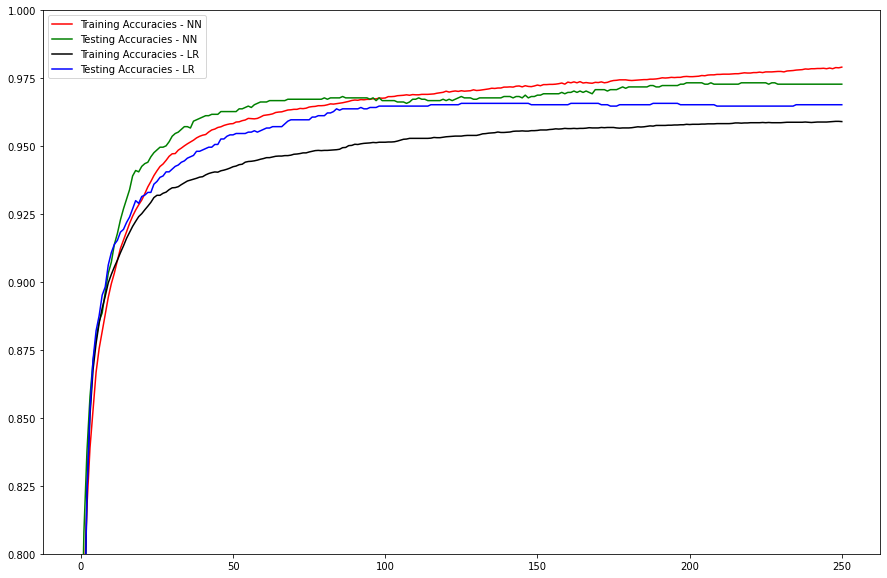

In [23]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [24]:
model_new = Model(layers[:-2])

In [25]:
plot_testing = model_new(testing_xdata)

Text(0.5, 1.0, 'Outputs')

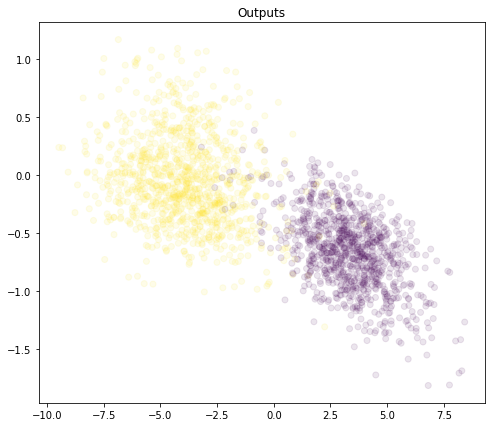

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

### Plotting probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

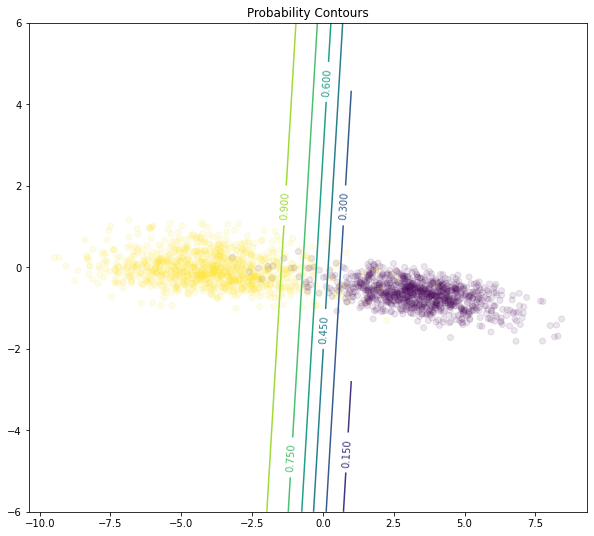

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );